In [1]:
from packages.data_classes.data2D import Data2D
from packages.data_classes.mesh import Mesh
from packages.plot_classes.tangram import Tangram

In [2]:
import numpy

In [3]:
SD0203_mesh = Mesh('./Data/Geometry/SD/S20190203@25-6-66_24-6.v001.sno')
FS0308_mesh = Mesh('./Data/Geometry/FS/S20190308@25-10-50_25-6.v001.sno')
XD0130_mesh = Mesh('./Data/Geometry/XD/X20190130@31-12-68_26-6.v001.sno')

be careful! data2D reads in IyIx order but quadmesh has to drawn in IxIy order to take care of the cuts!

In [4]:
# deuterium neutral density
SD_nNeutD = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_neutral/dab2-0_2D')

FS_nNeutD = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_neutral/dab2-0_2D')

XD_nNeutD = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_neutral/dab2-0_2D')

In [5]:
# electron density
SD_ne = Data2D(SD0203_mesh, './Data/SDP6/2D_data/density/n_electron/ne_2D')

FS_ne = Data2D(FS0308_mesh, './Data/FSP6/2D_data/density/n_electron/ne_2D')

XD_ne = Data2D(XD0130_mesh, './Data/XDP6/2D_data/density/n_electron/ne_2D')

In [6]:
# electron temperature
SD_te = Data2D(SD0203_mesh, './Data/SDP6/2D_data/temperature/T_electron/te_2D')

FS_te = Data2D(FS0308_mesh, './Data/FSP6/2D_data/temperature/T_electron/te_2D')

XD_te = Data2D(XD0130_mesh, './Data/XDP6/2D_data/temperature/T_electron/te_2D')

some preparation calculation

calculate ratio

In [8]:
SD_D2eRatio = SD_nNeutD.IyIx / SD_ne.IyIx

FS_D2eRatio = FS_nNeutD.IyIx / FS_ne.IyIx

XD_D2eRatio = XD_nNeutD.IyIx / XD_ne.IyIx

take out the outer divertor part

In [9]:
SD_D2eRatio_outerdiv = numpy.transpose(SD_D2eRatio[:, SD0203_mesh.ixcut[1]:])

FS_D2eRatio_outerdiv = numpy.transpose(FS_D2eRatio[:, FS0308_mesh.ixcut[1]:])

XD_D2eRatio_outerdiv = numpy.transpose(XD_D2eRatio[:, XD0130_mesh.ixcut[1]:])

In [10]:
# te
SD_te_outerdiv = numpy.transpose(SD_te.IyIx[:, SD0203_mesh.ixcut[1]:])

FS_te_outerdiv = numpy.transpose(FS_te.IyIx[:, FS0308_mesh.ixcut[1]:])

XD_te_outerdiv = numpy.transpose(XD_te.IyIx[:, XD0130_mesh.ixcut[1]:])

take a look at the data range

# start attempting plots

## prepare figure and its axes

In [11]:
import matplotlib.pyplot as plt

## do scatter plots

### D neutral to e density ratio

look at Te < 40 eV range

In [12]:
%%capture

fig_1, ax_1 = plt.subplots()

the data along flux tubes within 1 lambda q radially out from the separatrix

In [40]:
%%capture

ax_1.scatter(SD_te_outerdiv[:, SD0203_mesh.iycut : 22], SD_D2eRatio_outerdiv[:, SD0203_mesh.iycut : 22], c = "w", marker = "s", edgecolors = "r")
ax_1.scatter(FS_te_outerdiv[:, FS0308_mesh.iycut : 20], FS_D2eRatio_outerdiv[:, FS0308_mesh.iycut : 20], c = "w", marker = "^", edgecolors = "m")
ax_1.scatter(XD_te_outerdiv[:, XD0130_mesh.iycut : 24], XD_D2eRatio_outerdiv[:, XD0130_mesh.iycut : 24], c = "w", marker = ".", edgecolors = "b")

add legend using scatter plot trick

In [61]:
%%capture

ax_1_legend_marker_SD = ax_1.scatter([39], [5e-3], c = "w", marker = "s", edgecolors = "r")
ax_1_legend_marker_FS = ax_1.scatter([39], [3.6e-3], c = "w", marker = "^", edgecolors = "m")
ax_1_legend_marker_XD = ax_1.scatter([39], [2.5e-3], c = "w", marker = ".", edgecolors = "b")

In [60]:
ax_1_legend_marker_SD.remove()
ax_1_legend_marker_FS.remove()
ax_1_legend_marker_XD.remove()

add legend text

In [64]:
ax_1_legend_text_SD = ax_1.text(40, 4.6e-3, "SD10")
ax_1_legend_text_FS = ax_1.text(40, 3.3e-3, "SD20")
ax_1_legend_text_XD = ax_1.text(40, 2.3e-3, "XD")

set the axes label

In [66]:
%%capture
ax_1.set_xlabel("Te (eV)")
ax_1.set_ylabel("neutral deuterium / electron density ratio")

add some explanation text

In [44]:
ax_1_explain_text = ax_1.text(20, 5e-3, "data along flux tubes within $\lambda_{q}$ at OMP")
ax_1_explain_text.set_fontsize(12)

In [49]:
ax_1_explain_text.set_position([20, 7e-3])

In [41]:
ax_1.set_yscale("log")

In [62]:
ax_1.set_xbound(5, 45)
ax_1.set_ybound(1e-4, 1e-2)

In [36]:
ax_1.invert_yaxis()

In [67]:
ax_1.set_position([0.1, 0.1, 0.9, 0.9])

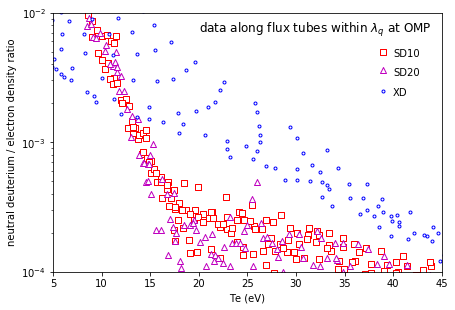

In [68]:
fig_1

In [69]:
fig_1.savefig('D2eRatioP6-lq_Scatter.svg', format='svg', bbox_inches='tight')

In [38]:
ax_1.clear()